In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#download mnist data and split into train and test sets
df = pd.read_csv('TYPASD.csv')

In [2]:
X = df.drop(['Label'], axis = 1).values
Y = df['Label']

X = StandardScaler().fit_transform(X)

Xnew = []
for i in range(0, len(X), 250):
    Xnew.append(X[i:250+i])
    
Ynew = []
for j in range(0, 187500, 250):
    Ynew.append(0)
    
for k in range(0, 194250, 250):
    Ynew.append(1)
    
# from itertools import groupby
# print([len(list(group)) for key, group in groupby(Y)])

Xnew = np.array(Xnew)
print(Xnew[0].shape)
print(Xnew.shape)
#X = StandardScaler().fit_transform(Xnew)

X_train, X_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size = 0.30, random_state = 101)

(250, 128)
(1527, 250, 128)


In [3]:
X_test.shape

(459, 250, 128)

In [4]:
# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
#reshape data to fit model
X_train = X_train.reshape(1068,250,128,1)
X_test = X_test.reshape(459,250,128,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

Using TensorFlow backend.


array([0., 1.], dtype=float32)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
#create model
model = Sequential()
#add model layers 
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(250,128,1),padding='SAME'))
model.add(Conv2D(32, (5,5), activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=10, verbose=0)
print(history)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


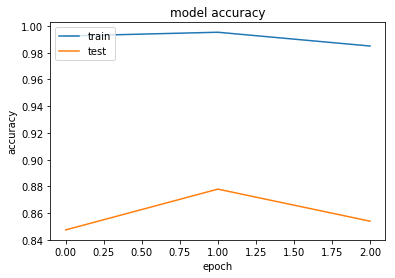

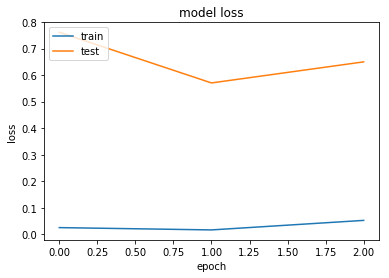

In [14]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.8608502e-04, 9.9981397e-01],
       [6.6582276e-03, 9.9334174e-01],
       [1.0251060e-05, 9.9998975e-01],
       [9.8005062e-01, 1.9949421e-02]], dtype=float32)

In [16]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.6497409737573567, 0.8540305010893247]
